In [182]:
# 1. Load the Heart Disease UCI dataset into a Pandas DataFrame.
import pandas as pd

df = pd.read_csv("../data/heart_disease.csv")

print("Rows:", len(df))
print("\nSample Rows:")
df.head()

Rows: 303

Sample Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [183]:
# 2. Handle missing values (imputation or removal).
print("Missing values before handling:")
print(df.isna().sum())
print("\nTotal missing values:", df.isna().sum().sum())

# Few missing values (6 out of 303 rows)
df_clean = df.dropna()
print("Rows after removing missing values:", len(df_clean))

Missing values before handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Total missing values: 6
Rows after removing missing values: 297


In [184]:
# Update the main dataframe
df = df_clean.copy()
print("\nMissing values after handling:")
print(df.isna().sum())


Missing values after handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


Categorical vs Numerical Variables/Data in dataset
Categorical data = Values represent discrete categories/groups, not measurable quantities
Numerical data = Values represent measurable quantities

Machine learning algorithms need numerical data, not categorical data - encoding converts categories into numbers they can process.

cp (1,2,3,4): Different chest pain types - categorical
sex (0,1): Male/Female - categorical
age (63,67,37, and so on): Actual years - numerical (67 > 63)
chol (233,286, and so on): Cholesterol levels - numerical

In [185]:
# 3. Perform data encoding (one-hot encoding for categorical variables).
print("Shape before encoding:", df.shape)
print(list(df.columns))

categorical_cols = ['cp', 'restecg', 'slope', 'thal']
print("Categorical columns:", categorical_cols)

# One-hot encode categorical variables
# Without prefix: Creates columns named just 1, 2, 3: So we add the prefix of original column
df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols)

print(f"\nShape after encoding (expanded columns): {df_encoded.shape}")
print(list(df_encoded.columns))

Shape before encoding: (297, 14)
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
Categorical columns: ['cp', 'restecg', 'slope', 'thal']

Shape after encoding (expanded columns): (297, 23)
['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca', 'num', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'restecg_0', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2', 'slope_3', 'thal_3.0', 'thal_6.0', 'thal_7.0']


In [186]:
# Update main dataframe with encoded features
df = df_encoded.copy()
print("Dataset shape:", df.shape)
print("\nSample of encoded data:")
df.head()

Dataset shape: (297, 23)

Sample of encoded data:


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,...,cp_4,restecg_0,restecg_1,restecg_2,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,63,1,145,233,1,150,0,2.3,0.0,0,...,False,False,False,True,False,False,True,False,True,False
1,67,1,160,286,0,108,1,1.5,3.0,2,...,True,False,False,True,False,True,False,True,False,False
2,67,1,120,229,0,129,1,2.6,2.0,1,...,True,False,False,True,False,True,False,False,False,True
3,37,1,130,250,0,187,0,3.5,0.0,0,...,False,True,False,False,False,False,True,True,False,False
4,41,0,130,204,0,172,0,1.4,0.0,0,...,False,False,False,True,True,False,False,True,False,False


Scale/Standardize all numerical features to have the same scale, preventing any feature from dominating due to larger values.

In [187]:
# 4. Standardize numerical features using StandardScaler
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (exclude binary/encoded features)
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
print("Numerical columns to scale:", numerical_cols)

print("\nBefore scaling - sample values:")
print(df[numerical_cols].head())

# Initialize and fit scaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nAfter scaling - sample values:")
print(df_scaled[numerical_cols].head())

Numerical columns to scale: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

Before scaling - sample values:
   age  trestbps  chol  thalach  oldpeak   ca
0   63       145   233      150      2.3  0.0
1   67       160   286      108      1.5  3.0
2   67       120   229      129      2.6  2.0
3   37       130   250      187      3.5  0.0
4   41       130   204      172      1.4  0.0

After scaling - sample values:
        age  trestbps      chol   thalach   oldpeak        ca
0  0.936181  0.750380 -0.276443  0.017494  1.068965 -0.721976
1  1.378929  1.596266  0.744555 -1.816334  0.381773  2.478425
2  1.378929 -0.659431 -0.353500 -0.899420  1.326662  1.411625
3 -1.941680 -0.095506  0.051047  1.633010  2.099753 -0.721976
4 -1.498933 -0.095506 -0.835103  0.978071  0.295874 -0.721976


In [188]:
# Update main dataframe with scaled features
df = df_scaled.copy()
print("Dataset shape:", df.shape)
print("\nSample of scaled data:")
df.head()

Dataset shape: (297, 23)

Sample of scaled data:


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,...,cp_4,restecg_0,restecg_1,restecg_2,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,0.936181,1,0.750380,-0.276443,1,0.017494,0,1.068965,-0.721976,0,...,False,False,False,True,False,False,True,False,True,False
1,1.378929,1,1.596266,0.744555,0,-1.816334,1,0.381773,2.478425,2,...,True,False,False,True,False,True,False,True,False,False
2,1.378929,1,-0.659431,-0.353500,0,-0.899420,1,1.326662,1.411625,1,...,True,False,False,True,False,True,False,False,False,True
3,-1.941680,1,-0.095506,0.051047,0,1.633010,0,2.099753,-0.721976,0,...,False,True,False,False,False,False,True,True,False,False
4,-1.498933,0,-0.095506,-0.835103,0,0.978071,0,0.295874,-0.721976,0,...,False,False,False,True,True,False,False,True,False,False


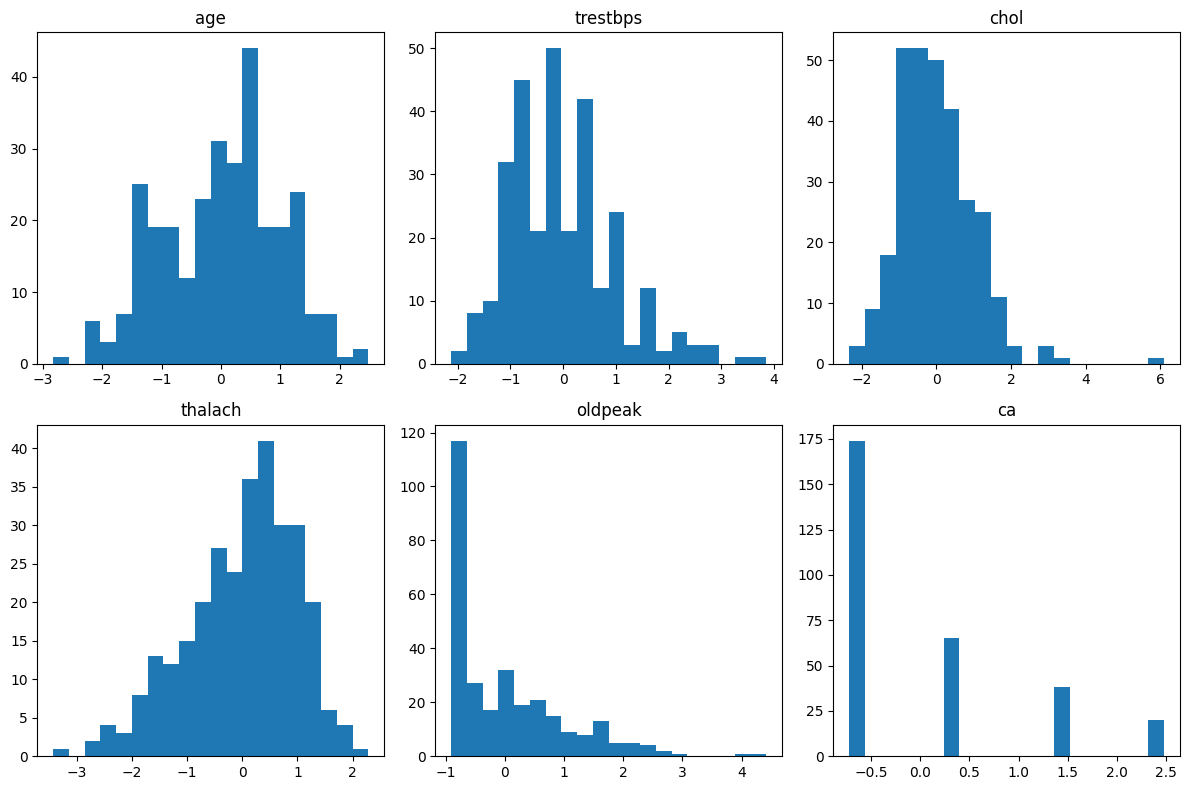

In [189]:
# 5. EDA - Histograms
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col], bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()

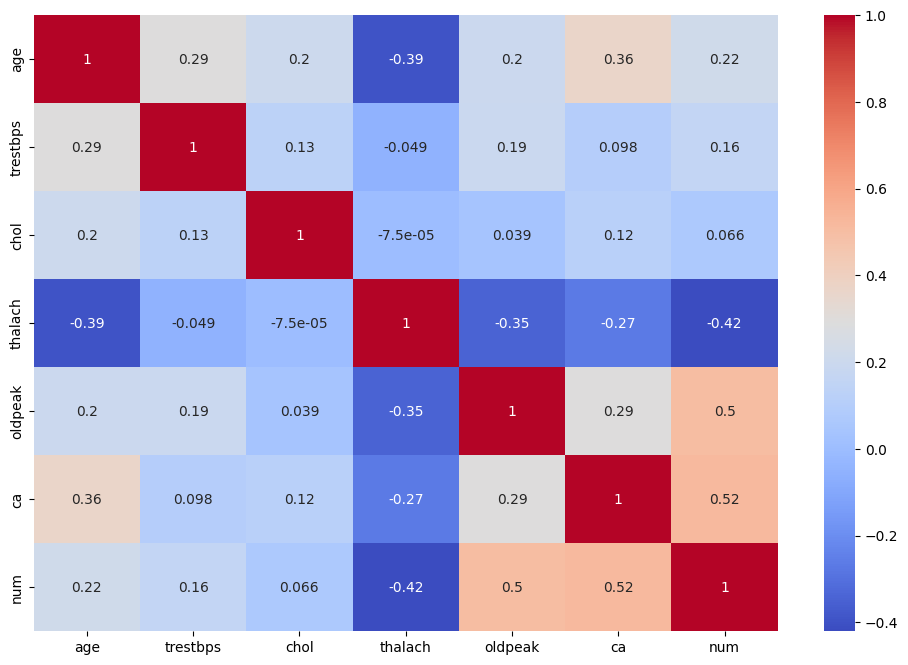

In [190]:
# Correlation Heatmap
import seaborn as sns

plt.figure(figsize=(12, 8))
corr = df[numerical_cols + ['num']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

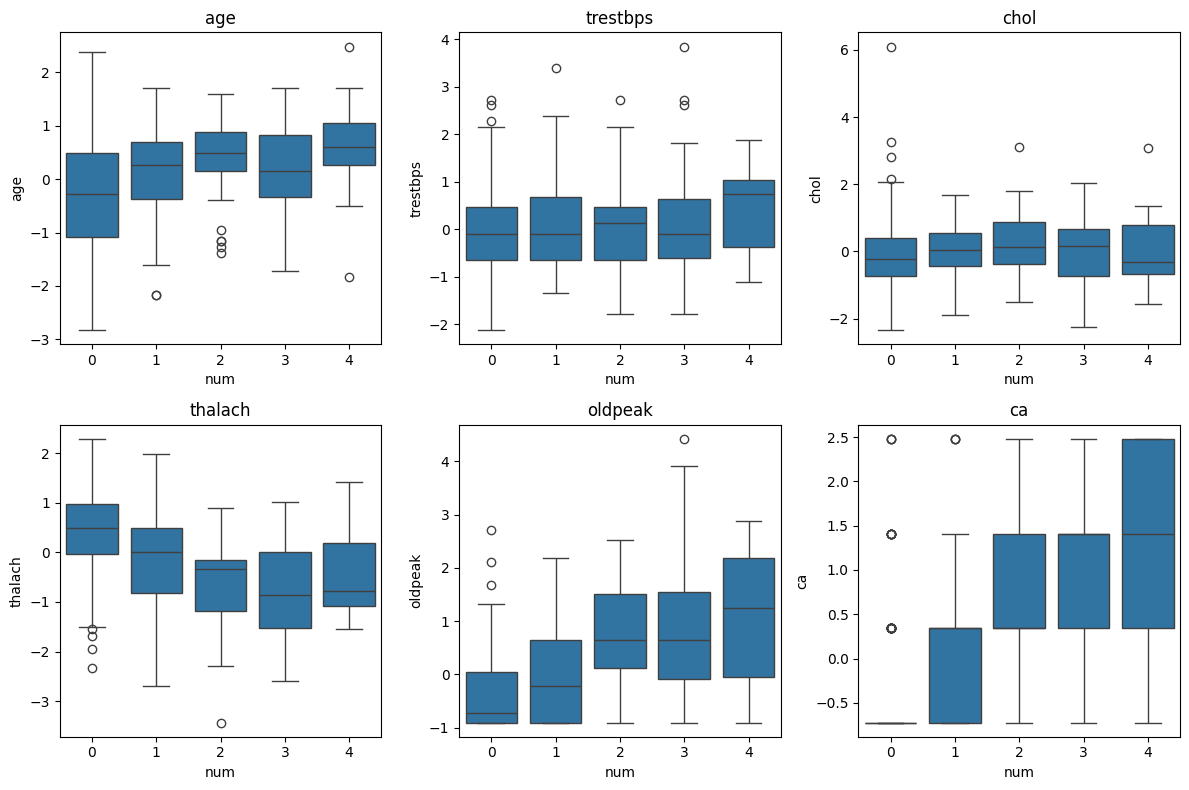

In [191]:
# Boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='num', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

In [192]:
# Save preprocessed dataset
df.to_csv("../data/heart_disease_preprocessed.csv", index=False)
print("Preprocessed dataset saved!")

Preprocessed dataset saved!
